### Problem Statement
Problem is to predict whether a patient has heart disease, by using other predictor variables available in the dataset.  The data is available <br>
from Kaggle at https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/.  Predictor variable include the following:<br>
> __Age__: age of the patient [years]<br>
> __Sex__: sex of the patient [M: Male, F: Female]<br>
> __ChestPainType__: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>
> __RestingBP__: resting blood pressure [mm Hg]<br>
> __Cholesterol__: serum cholesterol [mm/dl]<br>
> __FastingBS__: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br>
> __RestingECG__: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH<br>
  showing probable or definite left ventricular hypertrophy by Estes' criteria]<br>
> __MaxHR__: maximum heart rate achieved [Numeric value between 60 and 202]<br>
> __ExerciseAngina___: exercise-induced angina [Y: Yes, N: No]<br>
> __Oldpeak__: oldpeak = ST [Numeric value measured in depression]<br>
> __ST_Slope__: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br>

The response variable is<br> 
> __HeartDisease__: output class [1: heart disease, 0: Normal]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

### Read in the data

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Exploratory Data Analysis

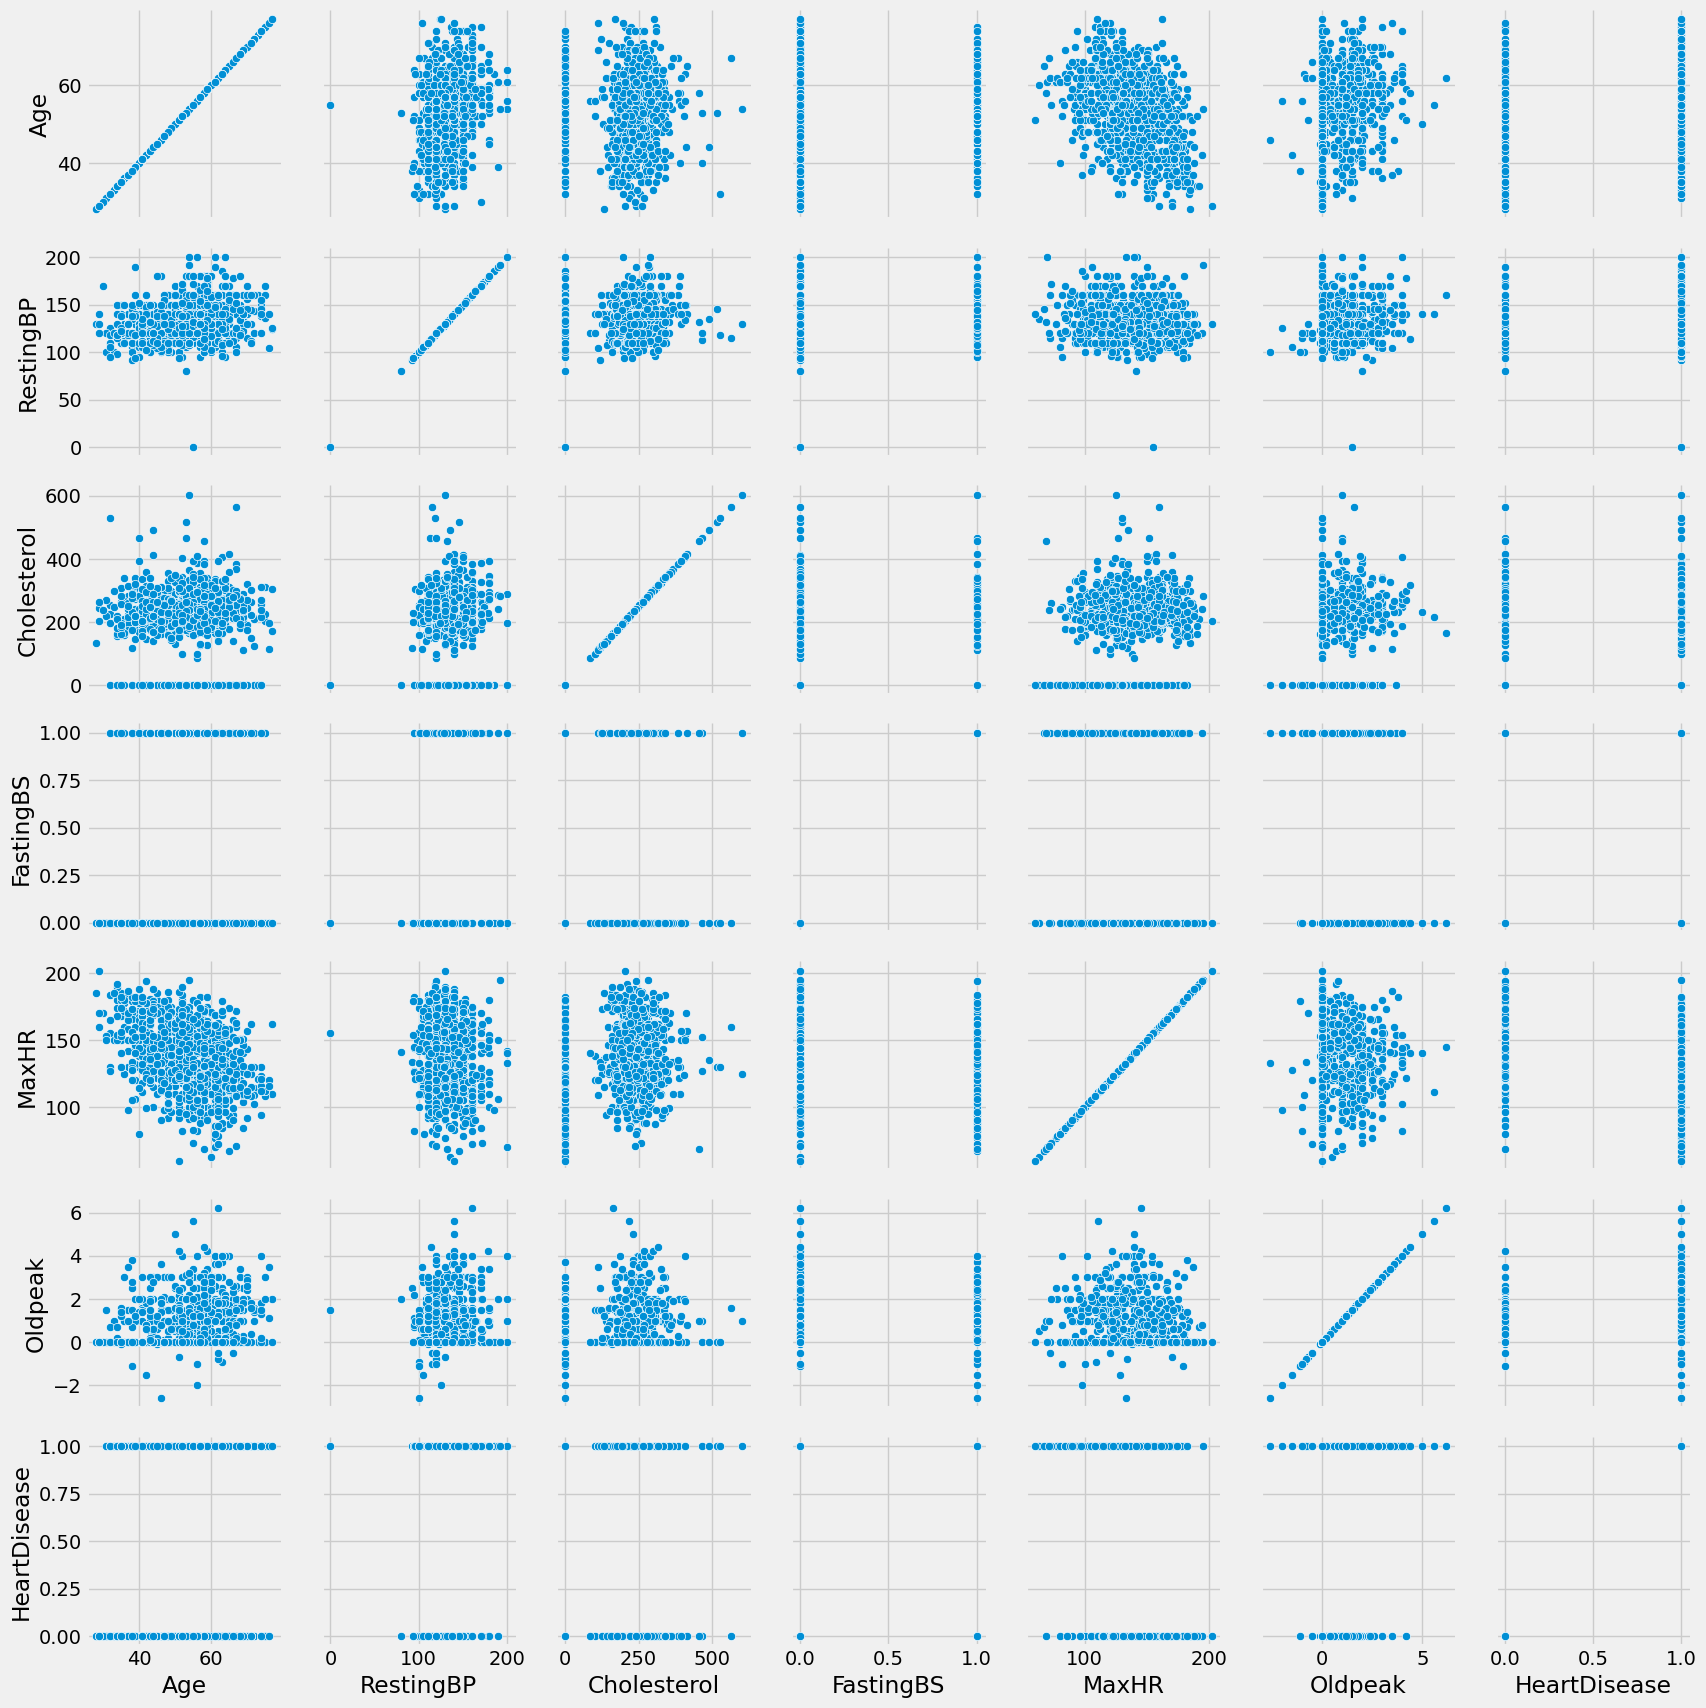

In [5]:
g = sns.PairGrid(data)
g.map(sns.scatterplot)

##### Clearly some data is not recorded for some observations such as zero cholesterol and zero resting blood pressure.

In [6]:
#rows where cholesterol = 0
print(len(data[(data['Cholesterol']==0)]))
#rows where resting bp = 0
print(len(data[(data['RestingBP']==0)]))

172
1


In [7]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

### EDA - Visualizations

Text(0.5, 0.98, 'Ages distribution related to Heart Disease')

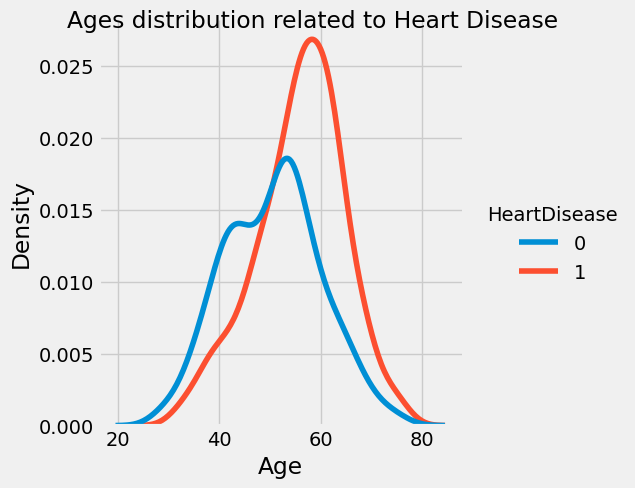

In [8]:
ax = sns.displot(
    x = 'Age',
    hue = 'HeartDisease',
    data = data,
    kind = "kde"
)
ax.fig.suptitle('Ages distribution related to Heart Disease')

Text(0.5, 1.0, 'Age related to Heart Disease')

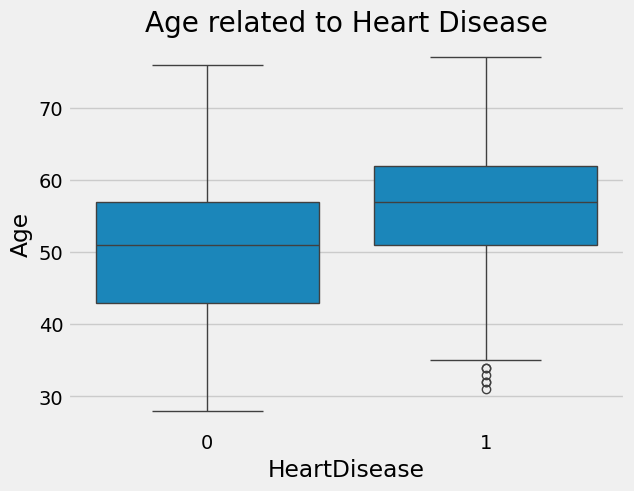

In [9]:
ax = sns.boxplot(
    data = data,
    x = 'HeartDisease',
    y = 'Age'
)
ax.set_title('Age related to Heart Disease')

##### The data shows a relationship with advancing age being an indicator for heart disease

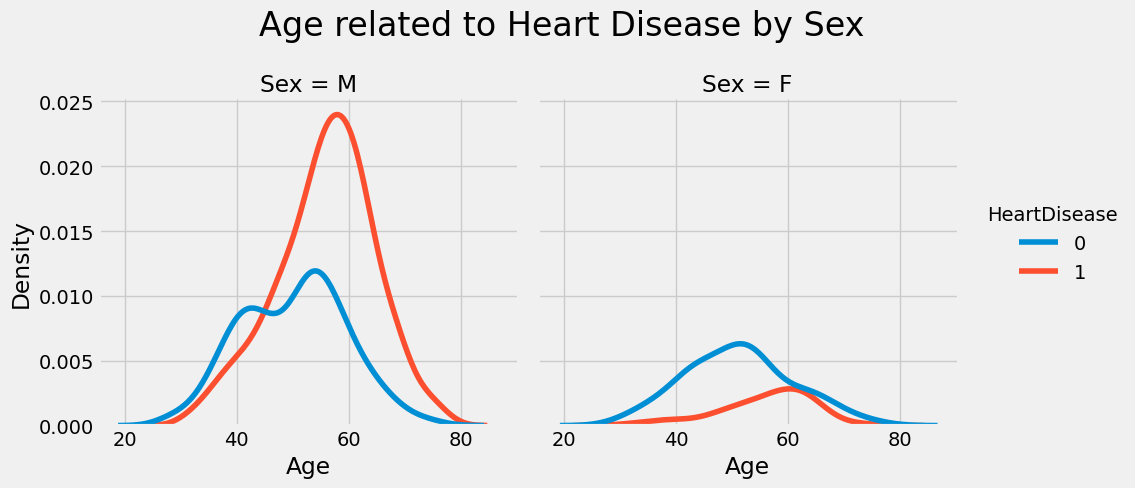

In [10]:
ax = sns.displot(
    data=data, 
    x="Age", 
    hue="HeartDisease", 
    col="Sex", 
    kind="kde",
)
plt.suptitle("Age related to Heart Disease by Sex", 
             fontsize=24, fontdict={"weight": "bold"})
plt.subplots_adjust(top=0.8)

##### Both age and sex appear to be indicators of heart disease.  Males show a much higher rate of heart disease and appear to have an earlier onset compared to females.

In [11]:
sex_totals = data['Sex'].value_counts()
heart_disease_totals = data.query('HeartDisease == 1')['Sex'].value_counts()
print('Heart disease rate on males: %.2f' % ((heart_disease_totals['M'] / sex_totals['M']) * 100))
print('Heart disease rate on females: %.2f' % ((heart_disease_totals['F'] / sex_totals['F']) * 100))

Heart disease rate on males: 63.17
Heart disease rate on females: 25.91


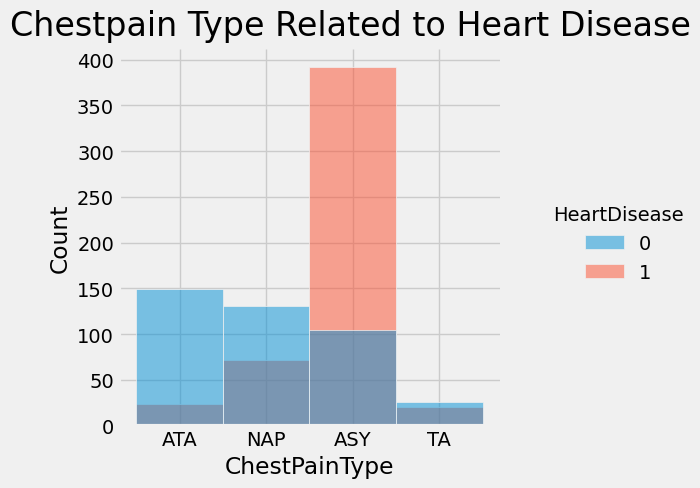

In [12]:
ax = sns.displot(
    data=data, 
    x="ChestPainType", 
    hue="HeartDisease",  
    kind="hist",
)
plt.suptitle("Chestpain Type Related to Heart Disease", 
             fontsize=24, fontdict={"weight": "bold"})
plt.subplots_adjust(top=0.9)

##### ChestPainType seems to be a big predictor of heart disease, in particularm, ASY.

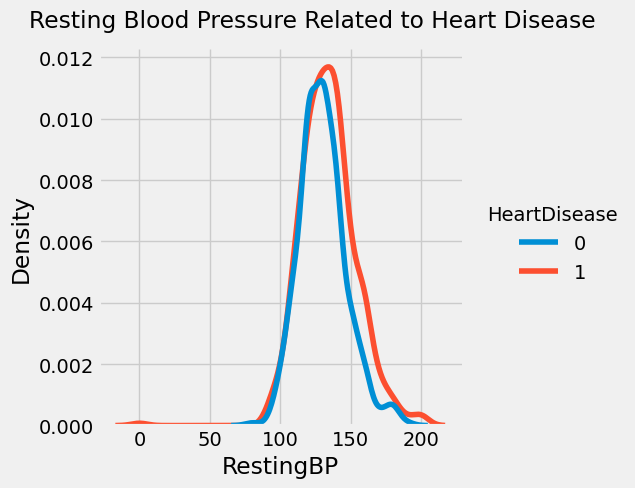

In [13]:
ax = sns.displot(
    x = 'RestingBP',
    hue = 'HeartDisease',
    data = data,
    kind = "kde"
)
ax.fig.suptitle('Resting Blood Pressure Related to Heart Disease')
plt.subplots_adjust(top=0.9)

In [14]:
##### Can see a slight skew for higher resting blood pressure to heart disease

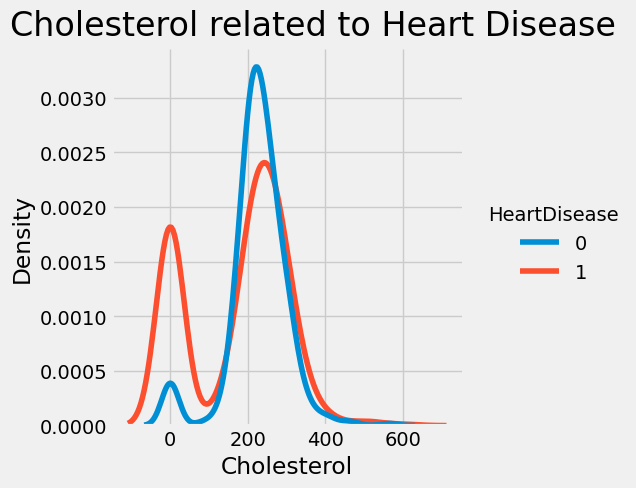

In [15]:
ax = sns.displot(
    data=data, 
    x="Cholesterol", 
    hue="HeartDisease",  
    kind="kde",
)
plt.suptitle("Cholesterol related to Heart Disease", 
             fontsize=24, fontdict={"weight": "bold"})
plt.subplots_adjust(top=0.9)

##### This does not seem like a big difference.  Also significant numbers of observations are missing, with a zero value.

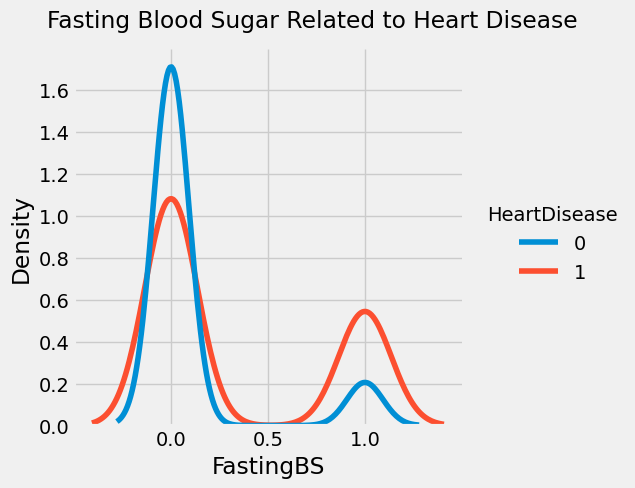

In [16]:
ax = sns.displot(
    x = 'FastingBS',
    hue = 'HeartDisease',
    data = data,
    kind = "kde"
)
ax.fig.suptitle('Fasting Blood Sugar Related to Heart Disease')
plt.subplots_adjust(top=0.9)

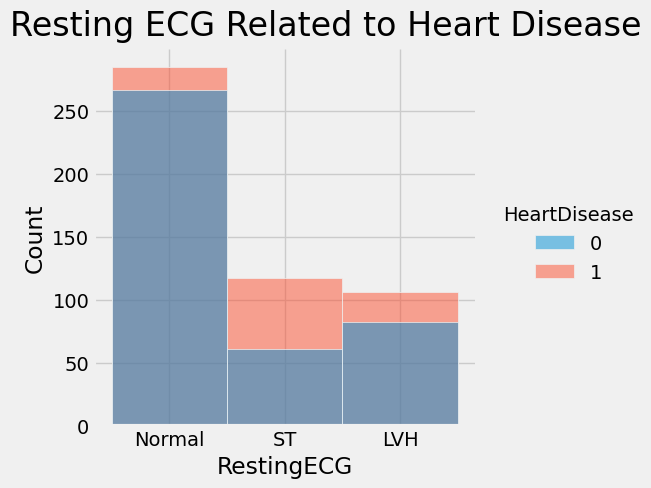

In [17]:
ax = sns.displot(
    data=data, 
    x="RestingECG", 
    hue="HeartDisease",  
    kind="hist",
)
plt.suptitle("Resting ECG Related to Heart Disease", 
             fontsize=24, fontdict={"weight": "bold"})
plt.subplots_adjust(top=0.9)

##### values of ST have a much higher incidence of heart disease compared to normal or ven LVH, which is also higher than normal.

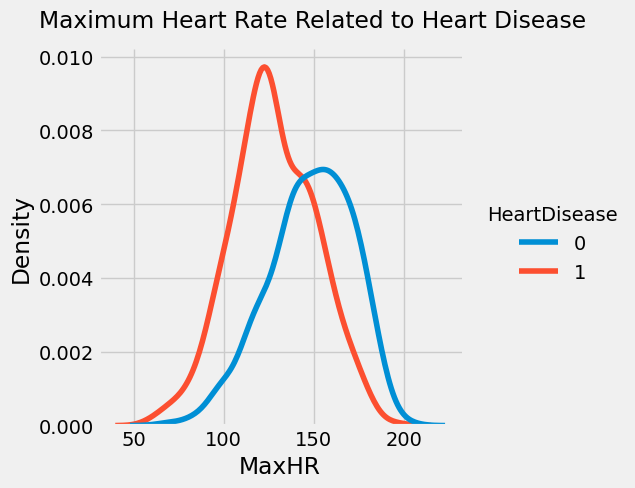

In [18]:
ax = sns.displot(
    x = 'MaxHR',
    hue = 'HeartDisease',
    data = data,
    kind = "kde"
)
ax.fig.suptitle('Maximum Heart Rate Related to Heart Disease')
plt.subplots_adjust(top=0.9)

##### having a lower maximum heart rate achieved would appear to be an indicator of heart disease.

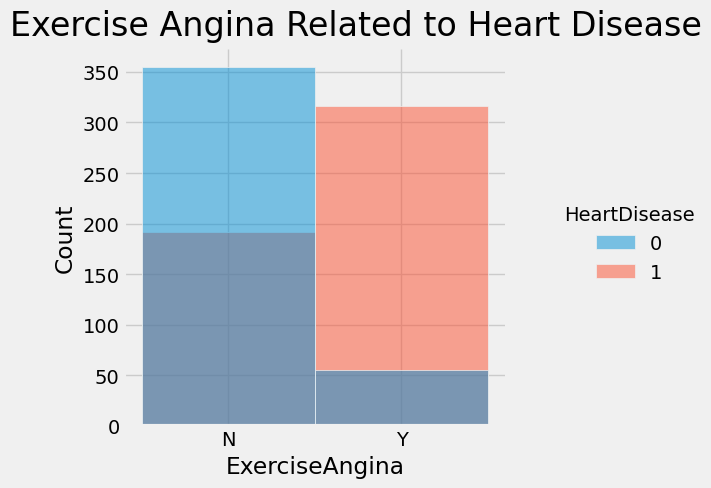

In [19]:
ax = sns.displot(
    data=data, 
    x="ExerciseAngina", 
    hue="HeartDisease",  
    kind="hist",
)
plt.suptitle("Exercise Angina Related to Heart Disease", 
             fontsize=24, fontdict={"weight": "bold"})
plt.subplots_adjust(top=0.9)

##### clearly having exercise induced angina is related to heart disease

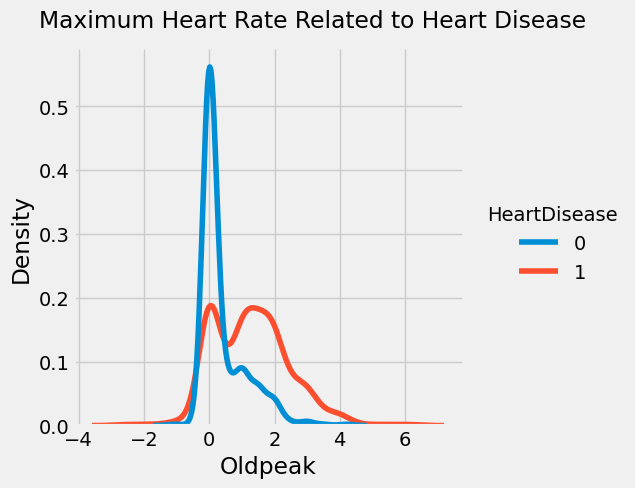

In [20]:
ax = sns.displot(
    x = 'Oldpeak',
    hue = 'HeartDisease',
    data = data,
    kind = "kde"
)
ax.fig.suptitle('Maximum Heart Rate Related to Heart Disease')
plt.subplots_adjust(top=0.9)

##### oldpeak and heart disease appear to be related.  Higher oldpeak relating to higher incidence of heart disease.

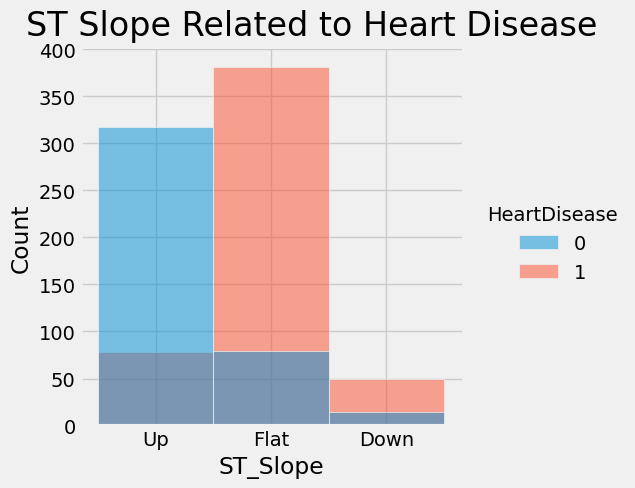

In [21]:
ax = sns.displot(
    data=data, 
    x="ST_Slope", 
    hue="HeartDisease",  
    kind="hist",
)
plt.suptitle("ST Slope Related to Heart Disease", 
             fontsize=24, fontdict={"weight": "bold"})
plt.subplots_adjust(top=0.9)

##### ST Slope is related to higher incidence of heart disease.

### Data handling approach
will remove cholesterol due to large number of missing observations and the appearance of little relation to cholesterol and heart disease.<br>
will remove the single observation where resting bloop pressure was zero (this is impossible).<br>
will scale the continuous predictor variables

In [22]:
data.drop(columns=['Cholesterol'], inplace=True)
data = data[data.RestingBP != 0]

In [23]:
data.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,0,Normal,122,N,0.0,Up,0


### Model Building

##### Correlation Matrix

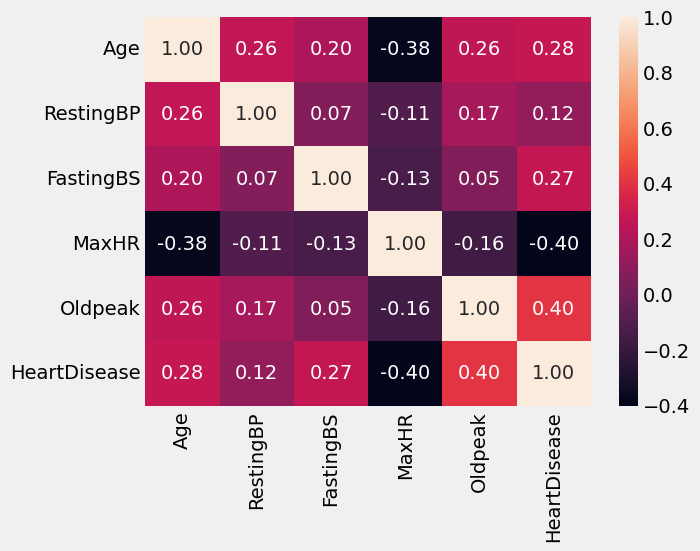

In [24]:
corr_matrix = data.corr(numeric_only = True)
ax = sns.heatmap(
    data = corr_matrix,
    annot = True,
    fmt = '.2f'
)

##### Read in packages for creating logistic regression model using sklearn

In [25]:
# import additional packages and scale continuous predictor variables
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
scaler = StandardScaler()
data[['Age', 'RestingBP', 'FastingBS', 'MaxHR', 'Oldpeak']] = scaler.fit_transform(data[['Age', 'RestingBP', 'FastingBS', 'MaxHR', 'Oldpeak']])
#split dataset in features and target variable
feature_cols = ['Age', 'Sex', 'ChestPainType', 'RestingBP','FastingBS','RestingECG','MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
X = data[feature_cols] # Features
X = pd.get_dummies(data=X, drop_first=True)
y = data.HeartDisease # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5, shuffle=True)

##### scale the data
##### split the data and create dummy variables for categorical variable with multiple categories.

In [26]:
scaler = StandardScaler()
data[['Age', 'RestingBP', 'FastingBS', 'MaxHR', 'Oldpeak']] = scaler.fit_transform(data[['Age', 'RestingBP', 'FastingBS', 'MaxHR', 'Oldpeak']])
#split dataset in features and target variable
feature_cols = ['Age', 'Sex', 'ChestPainType', 'RestingBP','FastingBS','RestingECG','MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
X = data[feature_cols] # Features
X = pd.get_dummies(data=X, drop_first=True)
y = data.HeartDisease # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5, shuffle=True)

##### Define logistic regression with parameters
##### Use the X_train_selected and X_test_selected to test variable combinations while building and scoring the model
##### Numerous models where built iteratively and then scored.  After many combinations, I arrived at the model below
##### that maximized accuracy with and used the fewest number of variable where it was an option.

In [27]:
lr = LogisticRegression(penalty="l2", C=1, class_weight="balanced", solver="liblinear")
X_train_selected = X_train[['Age','Sex_M','Oldpeak','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','ExerciseAngina_Y','ST_Slope_Flat','ST_Slope_Up']]
X_test_selected = X_test[['Age','Sex_M','Oldpeak','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','ExerciseAngina_Y','ST_Slope_Flat','ST_Slope_Up']]
lr.fit(X_train_selected, y_train)
y_test_pred = lr.predict(X_test_selected)

##### print out confusion matrix and accuracy score

In [28]:
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(metrics.accuracy_score(y_test, y_test_pred))
cnf_matrix

0.8521739130434782


array([[ 82,  13],
       [ 21, 114]], dtype=int64)

##### a much prettier confusion matrix

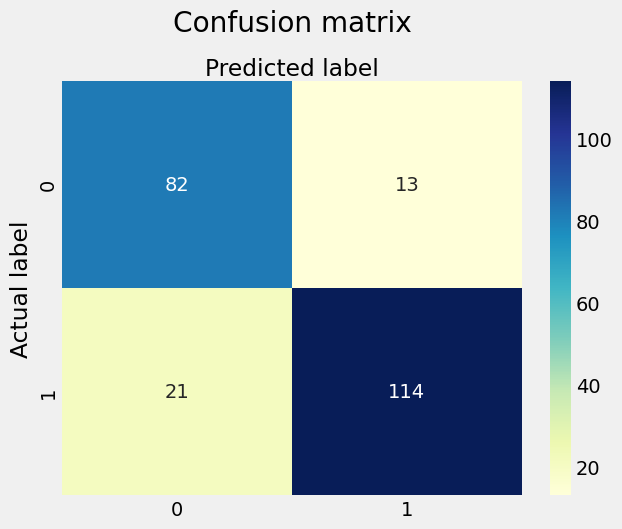

In [29]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label');

##### print out classification report for the model

In [30]:
from sklearn.metrics import classification_report
target_names = ['no heart disease', 'heart disease']
print(classification_report(y_test, y_test_pred, target_names=target_names))

                  precision    recall  f1-score   support

no heart disease       0.80      0.86      0.83        95
   heart disease       0.90      0.84      0.87       135

        accuracy                           0.85       230
       macro avg       0.85      0.85      0.85       230
    weighted avg       0.86      0.85      0.85       230



##### generate ROC graph

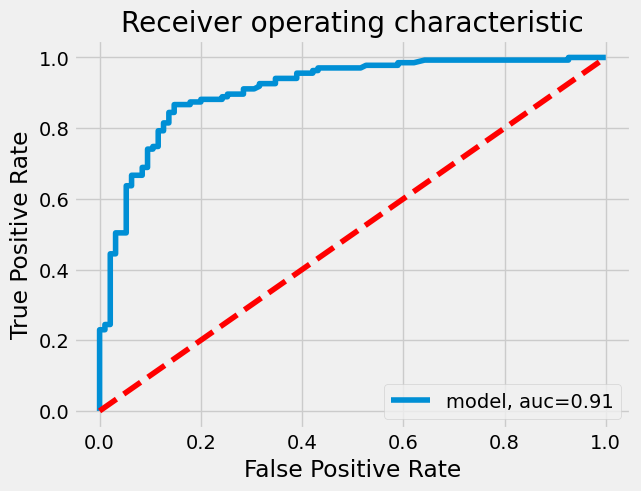

In [31]:
y_test_pred_proba = lr.predict_proba(X_test_selected)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred_proba)
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
plt.plot(fpr,tpr,label="model, auc="+str(round(auc,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=4)
plt.show()

### Results
The final model made use of the following variables: Age, Sex, Oldpeak, ChestPainType, ExerciseAngina, ST_Slope.
The dataset contained 11 possible predictor variables. We discarded Cholesterol since too many of the observations
were missing. The results of the model show an accuracy of 85.2% on the test data. I feel this result is good.
The recall and precision were both greater than .8 for both classes (no heart disease and heart disease).


### Conclusion/Discussion
I feel that my results using logistic regression model performed pretty well.  The dataset was fairly
new on Kaggle, but did have one other person who had used it in a two models using both Naive Bayes
and decision trees.  My model performed slightly better than both of his models, which achieved an
accuracy score of just under 85%. I wish that the data did not have so many missing observations for 
cholesterol since this where seem to be a strong predictor of heart disease.  However, my plot showing
cholesterol vs heart disease did not seem to show a strong relation.